## Name: Shrinika Telu
## Enroll No: 700741742

# 1.Implement Naïve Bayes method using scikit-learn library

Use dataset available with name glass
Use train_test_split to create training and testing part
Evaluate the model on test part using score and

classification_report(y_true, y_pred)


# 2. Implement linear SVM method using scikit-learn

Use the same dataset above
Use train_test_split to create training and testing part
Evaluate the model on test part using score and

Which algorithm you got better accuracy? Can you justify why?

classification_report(y_true, y_pred)

In [8]:
import numpy as np
import pandas as pd
import urllib

import sklearn
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score

import time
import warnings
warnings.filterwarnings("ignore")

In [9]:
# read the data
data = pd.read_csv('C:/Users/shrin/OneDrive/Desktop/NNDL/NNDL_Code and Data/NNDL_Code and Data/glass.csv')
print(data.shape)
X_train, X_test = train_test_split(
    data, test_size=0.2, random_state=int(time.time()))


# features columns
features = ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]


# Naïve Bayes Classifier
gauss = GaussianNB()


# train the classifier
gauss.fit(
    X_train[features].values,
    X_train["Type"]
         )


# make predictions
y_pred = gauss.predict(X_test[features])
print("Naïve Bayes\nTotal number of points: {}\nMislabeled points : {}\nAccuracy {:05.2f}%"
      .format(
          X_test.shape[0],
          (X_test["Type"] != y_pred).sum(),
          100 * (1 - (X_test["Type"] != y_pred).sum() / X_test.shape[0])
      ))

print("\n")


# Naïve Bayes Classifier performance
print(metrics.classification_report(X_test["Type"], y_pred))


# Linear Support Vector Classification
svc_linear = SVC(kernel='linear')


# train linear SVM model
svc_linear.fit(
    X_train[features].values,
    X_train["Type"]
)
Y_pred = svc_linear.predict(X_test[features])



# Linear SVM Model performance
acc_svc = round(svc_linear.score(
    X_test[features].values, X_test["Type"]) * 100, 2)

print("Linear SVM accuracy is:", acc_svc)


# Support vector classifier (SVC) with the radial basis function kernel (RBF)
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(
    X_train[features].values,
    X_train["Type"]
)


# model predictions
Y_pred = svc_rbf.predict(X_test[features])



# SVM RBF Model performance
acc_svc = round(svc_rbf.score(
    X_test[features].values, X_test["Type"]) * 100, 2)
print("SVM RBF model accuracy is:", acc_svc)
print("\n")
print(metrics.classification_report(X_test["Type"], Y_pred))

(214, 10)
Naïve Bayes
Total number of points: 43
Mislabeled points : 18
Accuracy 58.14%


              precision    recall  f1-score   support

           1       0.54      0.72      0.62        18
           2       0.80      0.25      0.38        16
           3       0.33      1.00      0.50         2
           5       1.00      0.50      0.67         2
           6       0.67      1.00      0.80         2
           7       0.75      1.00      0.86         3

    accuracy                           0.58        43
   macro avg       0.68      0.75      0.64        43
weighted avg       0.67      0.58      0.55        43

Linear SVM accuracy is: 72.09
SVM RBF model accuracy is: 37.21


              precision    recall  f1-score   support

           1       0.00      0.00      0.00        18
           2       0.37      1.00      0.54        16
           3       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.

Firstly, the libraries were imported such as pandas, sklearn.svm, sklearn.naive_bayes.
Then, read the provided dataframe from read() function and printed.
The dataframe is splitted into train & test.
Now feature the coloumns of the dataframe.
Implement the naïve bayes classifier & train it.
Now, the naïve bayes classifier is predicted and the accuracy is printed.
Now, the naïve bayes classifier performance is printed.
Implement the linear support vector classification & train it.
Now, the performance and the accuracy is printed.


Then Support vector classifier (SVC) with the radial basis function kernel (RBF) is trained and predicted.
Now, the performance and accuracy is printed.


By Comparing both the Naïve Bayes method and the linear SVM method, the accuracy of Naïve Bayes method is more with 58.14%
This is because as they both are parameter optimization. Naïve bayes treats them as independent, whereas SVM looks at the interactions between them to a certain degree, as long as you’re using a non-linear kernel.


# 3. Implement Linear Regression using scikit-learn


a) Import the given “Salary_Data.csv”

b) Split the data in train_test partitions, such that 1/3 of the data is reserved as test subset.

c) Train and predict the model.

d) Calculate the mean_squared error.

e) Visualize both train and test data using scatter plot.

In [10]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns

In [12]:
#reading the Salary_Data dataset
Salary_df=pd.read_csv("C:/Users/shrin/OneDrive/Desktop/NNDL/NNDL_Code and Data/NNDL_Code and Data/Salary_Data.csv")
Salary_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [14]:
#Splitting the data in Training and Testing side on X and Y
X = Salary_df.iloc[:, :-1].values
Y = Salary_df.iloc[:, 1].values
X_Training, X_Testing, Y_Training, Y_Testing = train_test_split(X,Y, test_size=1/3,random_state = 0)
regressor = LinearRegression()
regressor.fit(X_Training, Y_Training)
Y_Predict = regressor.predict(X_Testing)

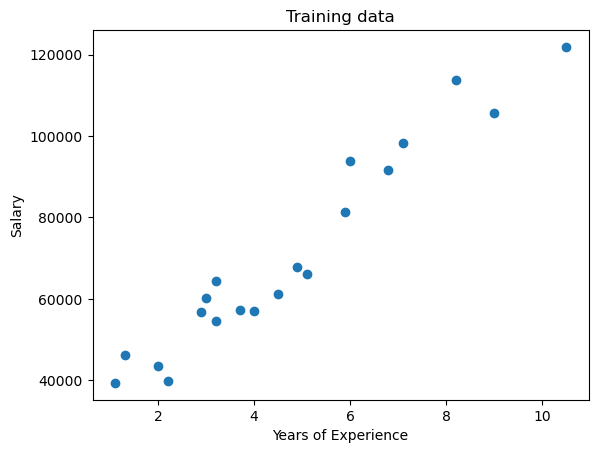

In [15]:
#Visualising Training data and Plotting
plt.title('Training data')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.scatter(X_Training, Y_Training)
plt.show()

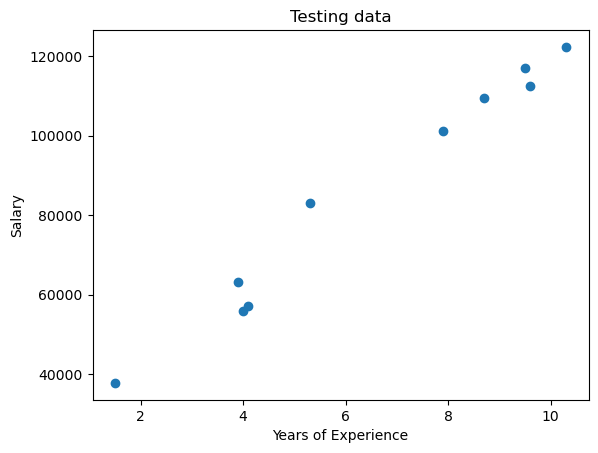

In [16]:
##Visualising Testing data and Plotting
plt.title('Testing data')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.scatter(X_Testing, Y_Testing)
plt.show()